Tarea #2
Juan Pablo Fernandez Delgado


## Instrucciones
Realice los siguientes ejercicios y envíe sus respuestas, en un archivo PDF, a través de TEC Digital a más tardar el martes 1° de octubre a las 10 PM. No se aceptarán entregas tardías.

Desarrolle todos los ejercicios con el mayor nivel de detalle posible. Se espera que el desarrollo algebraico sea formal. No será válido únicamente dar respuestas en prosa a las preguntas.


El archivo "CompraBicibletas" contiene información de 1000 clientes potenciales de bicicletas. La empresa frabicante de bicicletas desea conocer las características de estos clientes con el objetivo de lanzar un nuevo modelo que se ajuste a sus necesidades y lograr vender la mayor cantidad de bicicletas posible. Con base en los datos responda los siguientes apartados:

1.  Obtenga todas las estadísticas descriptivas de la varibale Income, para analizar como se comporta el ingreso anual (en dólares) de los clientes.
2.  Interprete el percentil 25% del ingreso.
3.  Solamente comparando la media y la mediana se puede concluir que el ingreso tiene una distribución simétrica? Si su respuesta es negativa, ¿Qué tipo de asimetría presenta la distribución?
4.  Obtenga las estadísticas descriptivas de las varibales Children, Cars y Age, referentes a la cantidad de hijos y carros que tiene el cliente y a su edad, respectivamente.
5.  Interprete el percentil 75% de la cantidad de hijos de los clientes.
6.  Construya histogramas para las cuatro variables: Income, Children, Cars y Age. Elija adecuadamente la cantidad de barras (bins) para una interpretación adecuada de la distribución de los datos. 

* Considere el siguiente comando para ajustar la dimensiones de los histogramas: 

`plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,wspace=0.50)`



7. Con base en los histogramas del punto anterior, se puede concluir que alguna de las variables sigue una distribución normal? Justifique su respuesta.
8. Las variables tienen distribuciones simétricas? Si su respuesta es negativa, ¿Qué tipo de asimetría presenta cada distirbución?
9.  Construya gráficos de caja para las cuatro variables: Income, Children, Cars y Age. 
10. Con base en los gráficos del punto anterior, cuál variable presenta mayor dispersión de los datos?
11. Calcule las varianzas y covarianzas de las cuatro variables  y construya la matriz $\Sigma$



\begin{equation}
\Sigma=\begin{bmatrix}\sigma_{Income}^{2}& 
\textrm{cov}\left(X_{Income},X_{Children}\right)& \textrm{cov}\left(X_{Income},X_{Cars}\right)& \textrm{cov}\left(X_{Income},X_{Age}\right)\\
.& 
\sigma_{Children}^{2}& \textrm{cov}\left(X_{Children},X_{Cars}\right)& \textrm{cov}\left(X_{Children},X_{Age}\right)\\
. & . & \sigma_{Cars}^{2}& \textrm{cov}\left(X_{Cars},X_{Age}\right)\\
. & .& .& \sigma_{Age}^{2}
\end{bmatrix}
\end{equation}


12. Calcule e interprete el coeficiente de correlación de Pearson entre la cantidad de hijos (Children) y la edad (Age).

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.distributions import Exponential
from torch.distributions import Uniform
from torch.distributions import Normal
import scipy.stats as ss


In [0]:
#datos = pd.read_csv('CompraBicicletas.csv',sep=';')
datos = pd.read_csv('https://raw.githubusercontent.com/jpablofdez/DataScience/master/Datos/CompraBicicletas.csv',sep=';')
#datos = datos.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [3]:
datos.head()

,ID,MaritalStatus,Gender,Income,Children,Education,Occupation,HomeOwner,Cars,CommuteDistance,Region,Age,PurchasedBike
0,12496,Married,Female,40000,1,Bachelors,SkilledManual,Yes,0,0-1Miles,Europe,42,No
1,24107,Married,Male,30000,3,PartialCollege,Clerical,Yes,1,0-1Miles,Europe,43,No
2,14177,Married,Male,80000,5,PartialCollege,Professional,No,2,2-5Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1Miles,Europe,36,Yes


In [4]:
datos.describe()


,ID,Income,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,56140.000000,1.908000,1.452000,44.190000
std,5347.333948,31081.609779,1.626094,1.124705,11.353537
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [5]:
 # 1) Se obtienen las estadisticas descriptivas de la columna Income.
  datos['Income'].describe()

count      1000.000000
mean      56140.000000
std       31081.609779
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

Media: 56140.0, Mediana: 60000.0, Moda: 0    60000
dtype: int64 


In [0]:
#2) Interprete el percentil 25% del ingreso.
p25 = datos["Income"].quantile(0.25)
  

In [44]:
p25

30000.0

In [0]:
# 3) Solamente comparando la media y la mediana se puede concluir que el ingreso tiene una distribución simétrica? 
#Si su respuesta es negativa, ¿Qué tipo de asimetría presenta la distribución?
media = datos['Income'].mean()
mediana = datos['Income'].median()
#moda = datos['Income'].mode()

In [46]:
print("Media: {}, Mediana: {}  ".format(media,mediana))

Media: 56140.0, Mediana: 60000.0  


In [0]:
def MostrarDistribucion(datos,columna,binPlot):
  plt.figure()
  n, bins, patches = plt.hist(datos,density=True,bins=binPlot)
  plt.ylabel("Probability")
  plt.title("Distribución de Columna: "+columna)
  plt.show()

In [0]:
asimetria = ss.skew(datos["Income"])

In [53]:
asimetria

0.7492319094131822

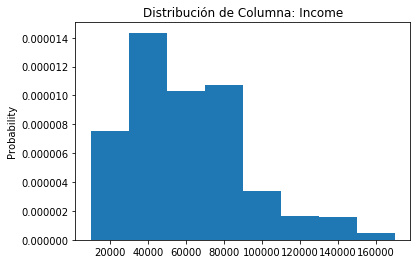

In [48]:
columna=datos['Income']
MostrarDistribucion(columna,"Income",8)

es positiva por que la cola va hacia la derecha

In [0]:
columNames = ['Children','Cars','Age']

In [0]:
X1 = datos[columNames]

In [58]:
# Obtenga las estadísticas descriptivas de las varibales Children, Cars y Age, 
# referentes a la cantidad de hijos y carros que tiene el cliente y a su edad, respectivamente.
X1.describe()

,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000
mean,1.908000,1.452000,44.190000
std,1.626094,1.124705,11.353537
min,0.000000,0.000000,25.000000
25%,0.000000,1.000000,35.000000
50%,2.000000,1.000000,43.000000
75%,3.000000,2.000000,52.000000
max,5.000000,4.000000,89.000000


In [0]:
# 5) Interprete el percentil 75% de la cantidad de hijos de los clientes.
#p75 = X1['Children'].count().percentile(0.75)
p75 = X1['Children'].quantile(0.75)

In [65]:
p75

3.0

In [0]:
#6)
columNames1 = ['Income','Children','Cars','Age']

In [0]:
X2 = datos[columNames1]

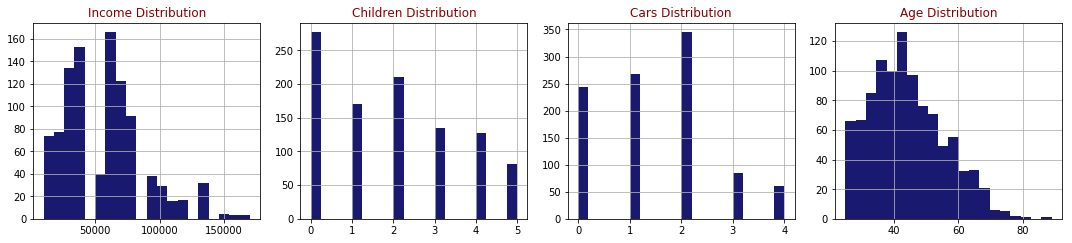

In [101]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(15,25))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
#draw_histograms(dataTest,dataTest.columns,6,3)
draw_histograms(X2,X2.columns,8,4)

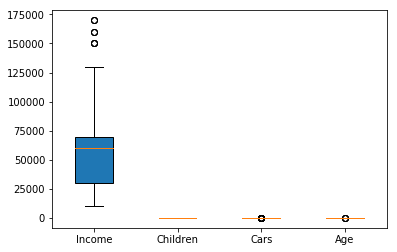

In [108]:

# 9) Construya gráficos de caja para las cuatro variables: Income, Children, Cars y Age.
box_plot_data=[X2.Income,X2.Children,X2.Cars,X2.Age]
plt.boxplot(box_plot_data,patch_artist=True,labels=['Income','Children','Cars','Age'])
plt.show()

In [0]:
#11)
covarianza = X2.cov()

In [110]:
covarianza

,Income,Children,Cars,Age
Income,9.660665e+08,13067.947948,15650.370370,59683.083083
Children,1.306795e+04,2.644180,0.501085,9.796276
Cars,1.565037e+04,0.501085,1.264961,2.433554
Age,5.968308e+04,9.796276,2.433554,128.902803


In [0]:
correlacion = X2.corr()

In [114]:
correlacion

,Income,Children,Cars,Age
Income,1.000000,0.258558,0.447695,0.169128
Children,0.258558,1.000000,0.273985,0.530621
Cars,0.447695,0.273985,1.000000,0.190577
Age,0.169128,0.530621,0.190577,1.000000
